## Import libraries

In [1]:
import numpy as np
import pandas as pd
import sys
from keras.models import Sequential
from keras.layers import GRU, Activation, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

## Import data & regularize

In [2]:
tier = 'DIAMOND'
data = pd.read_pickle("./RNN Dataset/DIAMOND/Test/Data/{}{}.pkl".format(tier, 2))
target = pd.read_pickle("./RNN Dataset/DIAMOND/Test/Target/{}{}.pkl".format(tier, 2))
numMatches = data.shape[0]
print("{} matches loaded".format(numMatches))

6000 matches loaded


## Bring RNN Classifier models

In [ ]:
import time
start, end = 2, 50
mod = sys.modules[__name__]

for tl in range(start, end+1):
    RNN = load_model("./RNN Classifiers/{0}/{0}{1}".format(tier, tl))
    setattr(mod, "RNN{}".format(tl), RNN)
    print(eval("RNN{}".format(tl)).summary()) # check model state

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 2, 22)             3036      
_________________________________________________________________
activation (Activation)      (None, 2, 22)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 22)                3036      
_________________________________________________________________
activation_1 (Activation)    (None, 22)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 46        
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)               

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 11, 22)            3036      
_________________________________________________________________
activation_18 (Activation)   (None, 11, 22)            0         
_________________________________________________________________
gru_19 (GRU)                 (None, 22)                3036      
_________________________________________________________________
activation_19 (Activation)   (None, 22)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 46        
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_10"
_________________________________________________________________
Layer (type)            

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_36 (GRU)                 (None, 20, 22)            3036      
_________________________________________________________________
activation_36 (Activation)   (None, 20, 22)            0         
_________________________________________________________________
gru_37 (GRU)                 (None, 22)                3036      
_________________________________________________________________
activation_37 (Activation)   (None, 22)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 46        
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_19"
_________________________________________________________________
Layer (type)           

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_54 (GRU)                 (None, 29, 22)            3036      
_________________________________________________________________
activation_54 (Activation)   (None, 29, 22)            0         
_________________________________________________________________
gru_55 (GRU)                 (None, 22)                3036      
_________________________________________________________________
activation_55 (Activation)   (None, 22)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 46        
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_28"
_________________________________________________________________
Layer (type)           

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_72 (GRU)                 (None, 38, 22)            3036      
_________________________________________________________________
activation_72 (Activation)   (None, 38, 22)            0         
_________________________________________________________________
gru_73 (GRU)                 (None, 22)                3036      
_________________________________________________________________
activation_73 (Activation)   (None, 22)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 46        
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_37"
_________________________________________________________________
Layer (type)           

## Analyze

In [12]:
data[0].shape
timestamps, input_dim = data[0].shape
input_data = data[0].reshape(1, timestamps, input_dim)
pred = RNN22.predict(input_data)
pred

array([[0.6064901 , 0.39350995]], dtype=float32)

In [13]:
target[0]

1

In [14]:
pred[0]

array([0.6064901 , 0.39350995], dtype=float32)

In [15]:
pred[0][0]

0.6064901

In [16]:
#start, end = 2, 50
for tl in range(start, end+1):
    print(" >> Processing : RNN{} test start".format(tl))
    setattr(mod, "target{}".format(tl), [])
    setattr(mod, "pred{}".format(tl), [])
    for idx in range(numMatches):
        match = data[idx]
        endTime = match.shape[0]
        if tl <= endTime:
            #print(" >> >> {}th match endTime = {}".format(idx, endTime))
            input_data = match[:tl, :]
            input_data = scaler.fit_transform(input_data)
            timestamps, input_dim = input_data.shape
            input_data = input_data.reshape(1, timestamps, input_dim)
            pred = eval("RNN{}".format(tl)).predict(input_data)
            bwRate, rwRate = pred[0]
            if bwRate > 0.5: pred = 1 # predict blue win
            else: pred = 0 # predict red win
            eval("pred{}".format(tl)).append(pred)
            eval("target{}".format(tl)).append(target[idx])
acc_lst = []
for tl in range(start, end+1):
    y_pred = eval("pred{}".format(tl))
    y_test = eval("target{}".format(tl))
    acc = accuracy_score(y_test, y_pred)
    acc_lst.append(acc)

 >> Processing : RNN2 test start
 >> Processing : RNN3 test start
 >> Processing : RNN4 test start
 >> Processing : RNN5 test start
 >> Processing : RNN6 test start
 >> Processing : RNN7 test start
 >> Processing : RNN8 test start
 >> Processing : RNN9 test start
 >> Processing : RNN10 test start
 >> Processing : RNN11 test start
 >> Processing : RNN12 test start
 >> Processing : RNN13 test start
 >> Processing : RNN14 test start
 >> Processing : RNN15 test start
 >> Processing : RNN16 test start
 >> Processing : RNN17 test start
 >> Processing : RNN18 test start
 >> Processing : RNN19 test start
 >> Processing : RNN20 test start
 >> Processing : RNN21 test start
 >> Processing : RNN22 test start
 >> Processing : RNN23 test start
 >> Processing : RNN24 test start
 >> Processing : RNN25 test start
 >> Processing : RNN26 test start
 >> Processing : RNN27 test start
 >> Processing : RNN28 test start
 >> Processing : RNN29 test start
 >> Processing : RNN30 test start
 >> Processing : RNN31

In [17]:
acc_lst

[0.944,
 0.945,
 0.9433333333333334,
 0.9437677290171868,
 0.9412850192920651,
 0.9449756752222781,
 0.9422915618184868,
 0.9443046468713303,
 0.9441181406276221,
 0.9462907015777107,
 0.9457547169811321,
 0.9453032104637337,
 0.9448441247002398,
 0.9466111977812446,
 0.9480337078651685,
 0.9483985765124555,
 0.9461926961926962,
 0.946180205603709,
 0.9457731958762886,
 0.9459922846120874,
 0.9434811979283945,
 0.9466407955372301,
 0.9423076923076923,
 0.939786156443444,
 0.9281511303809229,
 0.9347079037800687,
 0.9293893129770993,
 0.9075850043591979,
 0.8955987717502559,
 0.8607971445568114,
 0.7972483707458363,
 0.7992895204262878,
 0.7891304347826087,
 0.7950481430536451,
 0.7674418604651163,
 0.7344497607655502,
 0.75,
 0.6519823788546255,
 0.59375,
 0.6017699115044248,
 0.5263157894736842,
 0.5517241379310345,
 0.6097560975609756,
 0.4117647058823529,
 0.5,
 0.5625,
 0.5384615384615384,
 0.5,
 0.5]

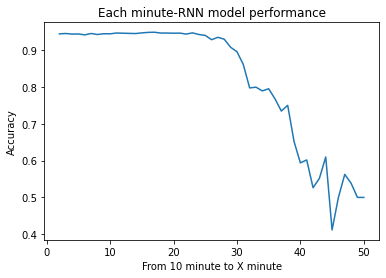

In [18]:
import matplotlib.pyplot as plt

x_axis = list(range(start, end+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, acc_lst)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Accuracy")
plt.title("Each minute-RNN model performance")
plt.show()

### 전체 골드와 승률 그래프를 비교해보자

In [23]:
data = pd.read_pickle("./RNN Dataset/DIAMOND/Test/Data/{}{}.pkl".format(tier, 2))
target = pd.read_pickle("./RNN Dataset/DIAMOND/Test/Target/{}{}.pkl".format(tier, 2))

In [47]:
for i in range(data.shape[0]):
    endTime = data[i].shape[0]
    if endTime == 27: # 경기 시간이 30분인 매치 탐색
        index = i
        sample = data[i]
        break
print(sample.shape)
regSample = scaler.fit_transform(sample)
timestamps, input_dim = regSample.shape
input_data = regSample.reshape(1, timestamps, input_dim)
pred = RNN27.predict(input_data)
print(pred)
print(target[index])

(27, 22)
[[0.9129953  0.08700474]]
1


In [48]:
totalGolds = []
for tl in range(start, endTime+1):
    totalGolds.append(sample[tl-1][0])

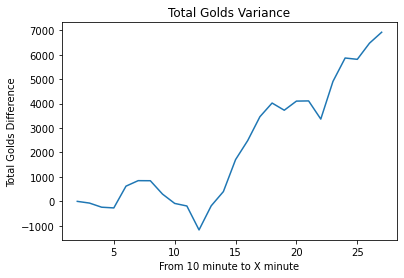

In [49]:
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, totalGolds)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Total Golds Difference")
plt.title("Total Golds Variance")
plt.show()

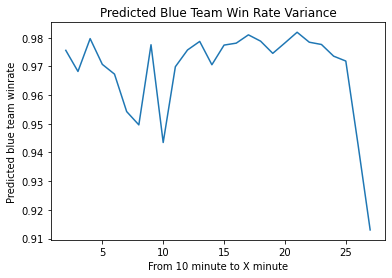

In [50]:
regSample = scaler.fit_transform(sample)
y_pred = []
for tl in range(start, endTime+1):
    input_data = regSample[:tl, :]
    timestamps, input_dim = input_data.shape
    input_data = input_data.reshape(1, timestamps, input_dim)
    pred = eval("RNN{}".format(tl)).predict(input_data)
    y_pred.append(pred[0][0])
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, y_pred)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Predicted blue team winrate")
plt.title("Predicted Blue Team Win Rate Variance")
plt.show()

In [52]:
sample[5]

array([ 6.220e+02,  2.722e+03,  2.000e+00,  4.000e-01,  2.000e+00,
        2.000e+00, -1.000e+00,  1.000e+00, -1.000e+00,  3.000e+00,
       -2.700e+01,  3.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00])

In [53]:
sample[6]

array([ 8.47e+02,  4.12e+02, -1.00e+00, -2.00e-01, -3.00e+00, -6.00e+00,
       -1.00e+00,  3.00e+00, -3.00e+00,  4.00e+00, -3.60e+01,  2.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00])

In [59]:
values = list(sample[6]-sample[5])
values

[225.0,
 -2310.0,
 -3.0,
 -0.6000000000000005,
 -5.0,
 -8.0,
 0.0,
 2.0,
 -2.0,
 1.0,
 -9.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [62]:
keys = [
    "total_gold", # numeric
    "current_gold", # numeric
    "total_level", # numeric
    "avg_level", #numeric
    "kills_total_minion", # numeric
    "kills_total_jungle_minion", # numeric
    "first_blood", # binary
    "kills",
    "deaths",
    "assists",
    "place_wards",
    "kills_wards",
    "first_tower", # binary
    "first_inhibitor", # binary
    "first_tower_lane", # category
    "kills_total_towers",
    "kills_mid_towers",
    "kills_top_towers",
    "kills_bot_towers",
    "kills_inhibitors",
    "first_dragon",
    "total_dragons",
    "rift_heralds",
]
dic = dict(zip(keys, values))
dic

{'total_gold': 225.0,
 'current_gold': -2310.0,
 'total_level': -3.0,
 'avg_level': -0.6000000000000005,
 'kills_total_minion': -5.0,
 'kills_total_jungle_minion': -8.0,
 'first_blood': 0.0,
 'kills': 2.0,
 'deaths': -2.0,
 'assists': 1.0,
 'place_wards': -9.0,
 'kills_wards': -1.0,
 'first_tower': 0.0,
 'first_inhibitor': 0.0,
 'first_tower_lane': 0.0,
 'kills_total_towers': 0.0,
 'kills_mid_towers': 0.0,
 'kills_top_towers': 0.0,
 'kills_bot_towers': 0.0,
 'kills_inhibitors': 0.0,
 'first_dragon': 0.0,
 'total_dragons': 0.0}

In [69]:
dic5_6 = dict(zip(keys, list(sample[6]-sample[5])))

In [70]:
dic5_6

{'total_gold': 225.0,
 'current_gold': -2310.0,
 'total_level': -3.0,
 'avg_level': -0.6000000000000005,
 'kills_total_minion': -5.0,
 'kills_total_jungle_minion': -8.0,
 'first_blood': 0.0,
 'kills': 2.0,
 'deaths': -2.0,
 'assists': 1.0,
 'place_wards': -9.0,
 'kills_wards': -1.0,
 'first_tower': 0.0,
 'first_inhibitor': 0.0,
 'first_tower_lane': 0.0,
 'kills_total_towers': 0.0,
 'kills_mid_towers': 0.0,
 'kills_top_towers': 0.0,
 'kills_bot_towers': 0.0,
 'kills_inhibitors': 0.0,
 'first_dragon': 0.0,
 'total_dragons': 0.0}

In [72]:
dic6_7 = dict(zip(keys, list(sample[7]-sample[6])))
dic6_7

{'total_gold': -3.0,
 'current_gold': -453.0,
 'total_level': 1.0,
 'avg_level': 0.20000000000000015,
 'kills_total_minion': 7.0,
 'kills_total_jungle_minion': -8.0,
 'first_blood': 0.0,
 'kills': 0.0,
 'deaths': 0.0,
 'assists': 0.0,
 'place_wards': -5.0,
 'kills_wards': 3.0,
 'first_tower': 0.0,
 'first_inhibitor': 0.0,
 'first_tower_lane': 0.0,
 'kills_total_towers': 0.0,
 'kills_mid_towers': 0.0,
 'kills_top_towers': 0.0,
 'kills_bot_towers': 0.0,
 'kills_inhibitors': 0.0,
 'first_dragon': 0.0,
 'total_dragons': 0.0}

In [75]:
dic0_2 = dict(zip(keys, list(sample[2])))
dict0_2

{'total_gold': -70.0,
 'current_gold': -70.0,
 'total_level': 0.0,
 'avg_level': 0.0,
 'kills_total_minion': -4.0,
 'kills_total_jungle_minion': 0.0,
 'first_blood': 0.0,
 'kills': 0.0,
 'deaths': 0.0,
 'assists': 0.0,
 'place_wards': -9.0,
 'kills_wards': 0.0,
 'first_tower': 0.0,
 'first_inhibitor': 0.0,
 'first_tower_lane': 0.0,
 'kills_total_towers': 0.0,
 'kills_mid_towers': 0.0,
 'kills_top_towers': 0.0,
 'kills_bot_towers': 0.0,
 'kills_inhibitors': 0.0,
 'first_dragon': 0.0,
 'total_dragons': 0.0}

In [77]:
regDic0_2 = dict(zip(keys, regSample[2]))
regDic0_2

{'total_gold': -0.912728880623474,
 'current_gold': -0.5768179672850141,
 'total_level': -0.5995397405231474,
 'avg_level': -0.5995397405231473,
 'kills_total_minion': -0.16171155683828772,
 'kills_total_jungle_minion': 0.40538579793873847,
 'first_blood': 2.3979157616563582,
 'kills': -1.0499000315915215,
 'deaths': 1.0499000315915215,
 'assists': -1.1518241443400568,
 'place_wards': 1.348497058056275,
 'kills_wards': -1.2786450652194643,
 'first_tower': -0.8944271909999156,
 'first_inhibitor': 0.0,
 'first_tower_lane': -0.8362420100070908,
 'kills_total_towers': -0.7009130258223497,
 'kills_mid_towers': 0.19611613513818404,
 'kills_top_towers': -0.6488856845230502,
 'kills_bot_towers': 0.0,
 'kills_inhibitors': 1.3038404810405295,
 'first_dragon': 0.0,
 'total_dragons': -1.1490485194281397}